In [72]:
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
max_customer = 20
max_transfer = 5
calculate_prob_states = 10
transfer_cost = 2
subscription_cost = 10
discount_rate = 0.9
states = [(i,j) for j in range(21) for i in range(21)]
actions = [i for i in range(-max_transfer, max_transfer+1)]
policy = np.zeros((max_customer+1, max_customer+1))
states_value = np.zeros((max_customer+1, max_customer+1))

In [74]:
class company():
  def __init__(self,req_rate, return_rate):
    self.pois_prob_req = poisson(req_rate)
    self.p_req_pmfs = [self.pois_prob_req.pmf(i) for i in range(calculate_prob_states)]
    self.pois_prob_ret = poisson(return_rate)
    self.p_ret_pmfs = [self.pois_prob_ret.pmf(i) for i in range(calculate_prob_states)]

A = company(3,3)
B = company(4,2)

In [75]:
def expected_value(state, action):
  new_state = (max(min(state[0] - action, max_customer),0) , max(min(state[1] + action, max_customer),0))
  e_reward = 0
  e_reward -=  transfer_cost*abs(action)
  for req_a in range(calculate_prob_states):
    for req_b in range(calculate_prob_states):
      for ret_a in range(calculate_prob_states):
        for ret_b in range(calculate_prob_states):

          prob = A.p_req_pmfs[req_a]*A.p_ret_pmfs[ret_a]*B.p_req_pmfs[req_b]*B.p_ret_pmfs[ret_b]

          subs = (min(new_state[0], req_a),min(new_state[1], req_b))
          sum_subs = subs[0] + subs[1]
          temp_r = sum_subs*subscription_cost

          subs_a = min(max(new_state[0] - subs[0] + ret_a, max_customer),0)
          subs_b = min(max(new_state[1] - subs[1] + ret_b, max_customer),0)
          expected_ret = temp_r + discount_rate * states_value[int(subs_a), int(subs_b)]
          e_reward += prob*expected_ret
  return e_reward

In [76]:
def policy_eval(threshold):
  is_done = False
  while(is_done != True):
    max_error = 0
    for i in range(max_customer+1):
      for j in range(max_customer+1):
        val_before = states_value[i][j]
        states_value[i][j] = expected_value([i,j],policy[i][j])
        max_error = max(max_error, abs(states_value[i][j]-val_before))
    if(max_error<threshold):
      is_done = True

In [77]:
def improve_policy():
  converged=True
  for i in range(max_customer+1):
    for j in range(max_customer+1):
      old_pol = policy[i][j]
      max_rew = expected_value([i,j],old_pol)
      best_action = policy[i][j]
      action_max = min(max_transfer,i)
      action_min = min(max_transfer,j)
      for action in range(-action_min, action_max+1):
        expected_reward_action = expected_value([i,j],action)
        if( expected_reward_action > max_rew):
          best_action = action
          max_rew = expected_reward_action

      policy[i,j] = best_action
      if(policy[i,j] != old_pol):
        converged = False
  return converged

In [78]:
def p2():
  converged = False
  threshold = 5
  while(converged != True):
    policy_eval(threshold)
    converged = improve_policy()
p2()

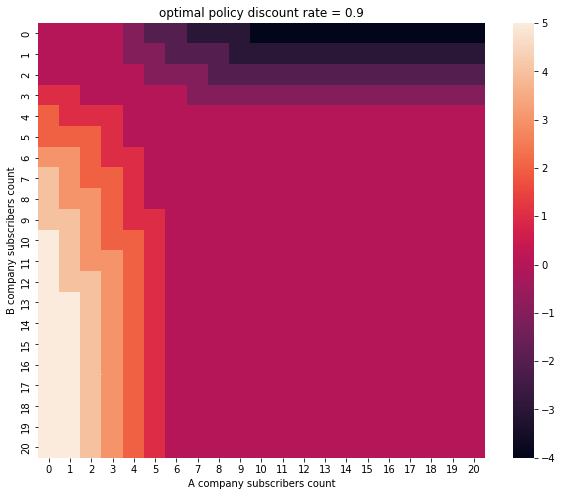

In [79]:
plt.figure(figsize=(10,8))
sns.heatmap(policy)
plt.title('optimal policy discount rate = 0.9')
plt.xlabel('A company subscribers count')
plt.ylabel('B company subscribers count')
plt.show()

In [80]:
max_customer = 20
max_transfer = 5
calculate_prob_states = 10
transfer_cost = 2
subscription_cost = 10
discount_rate = 1
states = [(i,j) for j in range(21) for i in range(21)]
actions = [i for i in range(-max_transfer, max_transfer+1)]
policy = np.zeros((max_customer+1, max_customer+1))
states_value = np.zeros((max_customer+1, max_customer+1))

In [81]:
def p2():
  converged = False
  threshold = 5
  while(converged != True):
    policy_eval(threshold)
    converged = improve_policy()
p2()

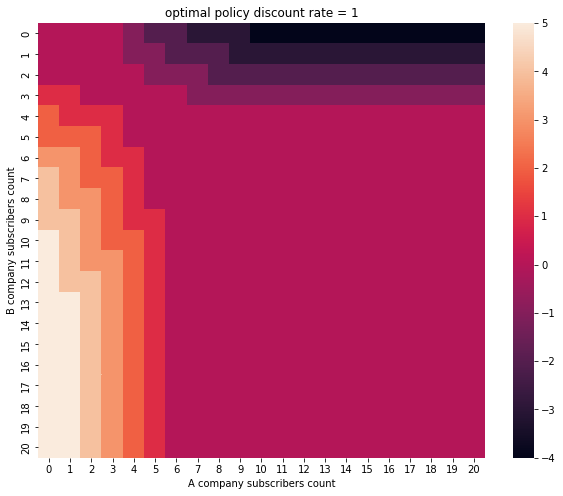

In [82]:
plt.figure(figsize=(10,8))
sns.heatmap(policy)
plt.title('optimal policy discount rate = 1')
plt.xlabel('A company subscribers count')
plt.ylabel('B company subscribers count')
plt.show()

In [83]:
max_customer = 20
max_transfer = 5
calculate_prob_states = 10
transfer_cost = 6
subscription_cost = 10
discount_rate = 0.9
states = [(i,j) for j in range(21) for i in range(21)]
actions = [i for i in range(-max_transfer, max_transfer+1)]
policy = np.zeros((max_customer+1, max_customer+1))
states_value = np.zeros((max_customer+1, max_customer+1))

In [84]:
def p2():
  converged = False
  threshold = 5
  while(converged != True):
    policy_eval(threshold)
    converged = improve_policy()
p2()

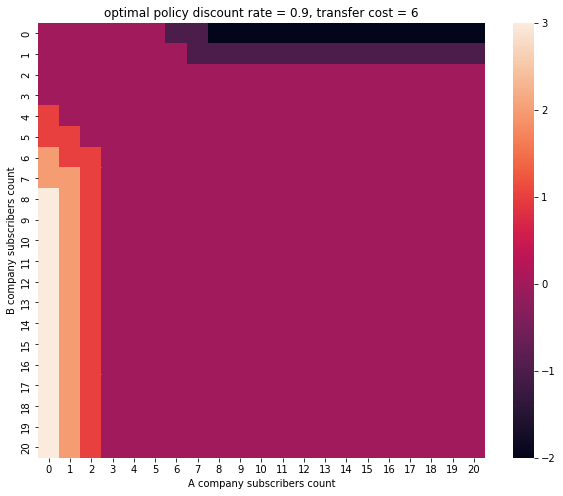

In [85]:
plt.figure(figsize=(10,8))
sns.heatmap(policy)
plt.title('optimal policy discount rate = 0.9, transfer cost = 6')
plt.xlabel('A company subscribers count')
plt.ylabel('B company subscribers count')
plt.show()